# Algoritmo PSO para função bidimensional

## Implementação

Abaixo a implementação da classe responsável por executar o PSO, dado alguns parâmetros

In [35]:
import numpy as np
import random

# Redução Linear da Ponderação de Inércia
wmax = 0.9
wmin = 0.4

c1max = 2
c1min = 1

c1 = 2
c2 = 2
w = 0.5

# Definição de Partícula
class Particle:

    def __init__(self,x0,v0,tmax):

        self.pbest = np.zeros(2,float)
        self.positions = np.zeros((tmax,2),float)
        self.velocities = np.zeros((tmax,2),float)

        self.positions[0] = x0
        self.velocities[0] = v0
        self.pbest = x0

    def update_position(self,it,gbest,w):

        # Gera números aleatórios entre 0 e 1 para r1 e r2
        r1 = random.random()
        r2 = random.random()

        # Calcular velocidade
        inertia = w*self.velocities[it]
        cognitive = c1*r1*(self.pbest - self.positions[it])
        social = c2*r2*(gbest - self.positions[it])

        v = inertia + cognitive + social

        # Inseri-los no histórico de iterações
        self.positions[it + 1] = v + self.positions[it]
        self.velocities[it + 1] = v

# Algoritmo PSO
class PSO:
    def __init__(self,n,tmax,bounds,f):

        # Iniciar enxame
        swarm = []
        for i in range(n):

            # Randomiza posição inicial
            x0 = np.array([
                random.uniform(bounds[0][0], bounds[0][1]),
                random.uniform(bounds[1][0], bounds[1][1])
            ],float)

            # Velocidade inicial nula
            v0 = np.array([0,0],float)

            # Adiciona particular no enxame
            swarm.append(Particle(x0, v0,tmax))

        # Iniciar gbest conforme o enxame inicial
        pbest_fitness = [f(particle.pbest) for particle in swarm]
        gbest = swarm[np.argmin(pbest_fitness)].pbest

        # Aplicação do algoritmo
        for it in range(0,tmax - 1):

            # Atualizar fator de inércia e fator cognitivo
            w = wmax - it*(wmax - wmin)/tmax
            c1 = c1max - it*(c1max - c1min)/tmax

            # Análise das posições: atualização do pbest e gbest
            for particle in swarm:

                position = particle.positions[it]

                # Verificar se sua posição atual é um pbest
                if f(position) < f(particle.pbest):
                    particle.pbest = position

                # Verificar se sua posição atual é um gbest
                if f(position) < f(gbest):
                    gbest = position

                # Atualizar posição da particula
                particle.update_position(it,gbest,w)

        # Resultados
        self.solution = gbest
        self.minimum = f(gbest)

Finalmente, a chamada da classe

In [36]:
# Função do trabalho
def costf(position):

    # Constantes
    a = 500
    b = 0.1
    c = 0.5 * np.pi

    # Componentes das coordenadas
    x = position[0]
    y = position[1]

    # Funções auxiliares
    z = -x * np.sin(np.sqrt(np.abs(x))) - y * np.sin(np.sqrt(np.abs(y)))

    x = x/250
    y = y/250

    r = 100 * (y - x**2)**2 + (1 - x)**2
    r1 = (y - x**2)**2 + (1 - x)**2
    rd = 1 + r1

    x = 25*x
    y = 25*y

    F10 = -a * np.exp(-b * np.sqrt((x**2 + y**2) / 2)) - np.exp((np.cos(c * x) + np.cos(c * y)) / 2) + np.exp(1)
    zsh = 0.5 - ((np.sin(np.sqrt(x**2 + y**2)))**2 - 0.5) / (1 + 0.1 * (x**2 + y**2))**2
    Fobj = F10 * zsh

    # Funções compostas
    w4 = np.sqrt(r**2 + z**2) + Fobj
    w23 = z / rd
    w27 = w4 + w23
    w35 = w23 + w27

    # Retorno do fitness
    return w35

p = PSO(30,80,((-500,500),(-500,500)),costf)

print(f"{p.minimum} em {p.solution}")

# Cabeçalho do CSV

with open('./data.csv','a') as file:
    file.write("particles,iterations,x,y,fitness\n")
    for n in range(10):
        # Iterações aumentam de 25 a 100, particulas constantes
        for i in range(25,100 + 25,25):
            p = PSO(30,i,((-500,500),(-500,500)),costf)
            file.write(f"{30},{i},{p.solution[0]},{p.solution[1]},{p.minimum}\n")

-498.9978242466769 em [0.00058171 0.00021735]


## Resultados da simulação

Carregar arquivo gerado pelas simulações

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

display(data)

,particles,iterations,x,y,fitness
0,30,25,210.498985,200.145870,-402.186573
1,30,50,408.366311,704.104879,-442.868711
2,30,75,210.682522,200.798072,-402.244183
3,30,100,0.000156,-0.000105,-498.999337
4,30,25,406.559664,694.972380,-438.017995
5,30,50,408.374987,704.344430,-442.872802
6,30,75,210.702410,200.802535,-402.244248
7,30,100,210.702977,200.796063,-402.244254
8,30,25,204.596702,193.129046,-390.620870
9,30,50,0.147898,0.072009,-498.342685


## Cenários

Iterações aumentam, número de particulas constantes

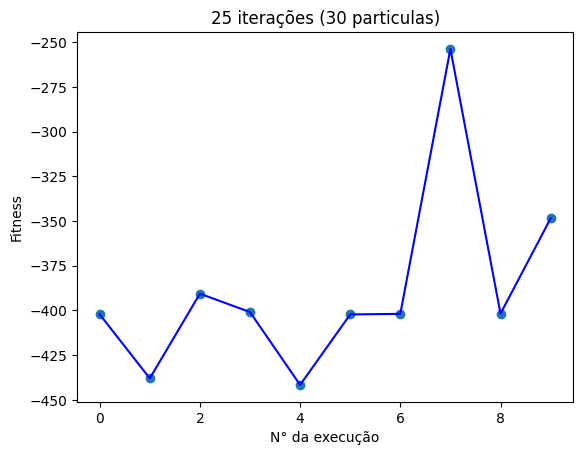

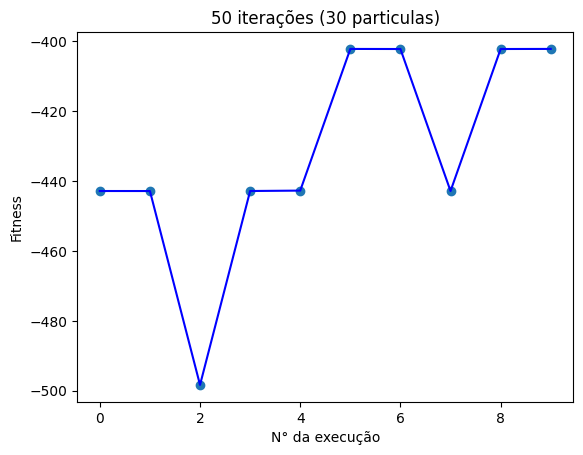

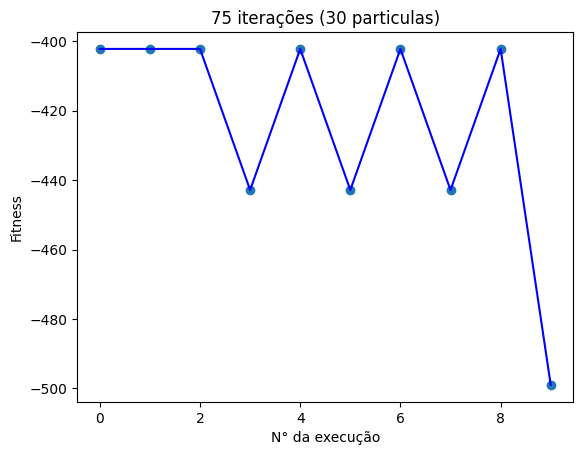

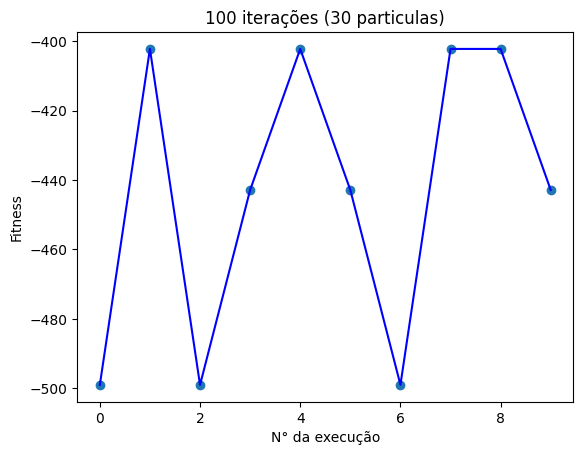

In [38]:
df_constpart = data.query("particles == 30")
df_constpart.reset_index(inplace=True)

for i in range(25,100 + 25,25):
    df = df_constpart.query(f"iterations == {i}")
    executions = [index for index, element in enumerate(df['fitness'])]
    fitness = df['fitness']

    fig, ax = plt.subplots()

    ax.scatter(executions,fitness)

    plt.title(f"{i} iterações (30 particulas)")
    plt.plot(executions, fitness, 'b')
    plt.xlabel("N° da execução")
    plt.ylabel("Fitness")